<a href="https://colab.research.google.com/github/bhramizadafiya/ADS500B--Final-Project/blob/main/ADS500B_FinalProject_Step3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Supervised Learning**

It involves training a model on a labeled dataset, where the input data (features) are paired with known output labels (target). It involves learning the relationship between inputs and outputs to make predictions on new, unseen data.

Some of the key algorithms of Supervised learning method are Linear Regression, Logistic Regression
Decision Trees, Random Forests, Support Vector Machines (SVMs) and Neural Networks.

**Unsupervised Learning**

It involves training a model on an unlabeled dataset to uncover hidden patterns, structures, or relationships in the data. The goal is to understand the data's underlying structure without predefined labels.

Some of the key Algorithms are K-Means, Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering), Principal Component Analysis (PCA).





**Why Supervised Learning Fits for our Dataset?**

The **deposit** column of the dataset provides explicit labels to classify or predict whether the customer will subscribe to a term deposit based on their attributes.

The problem statement is clearly identified as classification problem as the labels present are either 'yes/no'.

Due to the above reasons, we can conclude that Supervised Learning method is the best fit method for this problem.


**Identifying Dependent and Independent variables**

Dependent Variable (Target)
deposit: This is the outcome variable which is predicted. It indicates whether a customer subscribed to a term deposit (values: "yes" or "no").

Independent Variables (Features)
The rest of the columns are potential predictors of the deposit outcome. These include:

**Numerical Features:**

*age:* Age of the customer.

*balance:* Average yearly balance in euros.

*duration:* Duration of the last contact in seconds.

*campaign:* Number of contacts performed during the campaign.

*pdays:* Days since the client was last contacted (-1 if never contacted).

*previous:* Number of contacts performed before this campaign.

**Categorical Features:**

*job:* Type of job.

*marital:* Marital status.

*education:* Level of education.

*default:* Whether the client has credit in default.

*housing:* Whether the client has a housing loan.

*loan:* Whether the client has a personal loan.

*contact*: Communication type (e.g., telephone, cellular).

*month:* Last contact month of the year.

*poutcome:* Outcome of the previous marketing campaign.

**Temporal Features:**

*day:* Last contact day of the month.


**Logistic Regression Algorithm**

In [56]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files

uploaded = files.upload()

In [20]:
data=pd.read_csv('Marketing data.csv')

# Explore the data to identify the target variable and predictors
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43872 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    43905 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    43828 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  deposit    45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB
None
    age           job  marital  education default  balance hous

In [21]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


In [22]:
# Handle categorical variables with one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check the transformed data
print(data_encoded.head())

    age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0  58.0     2143    5       261         1     -1         0            False   
1  44.0       29    5       151         1     -1         0            False   
2  33.0        2    5        76         1     -1         0            False   
3  47.0     1506    5        92         1     -1         0             True   
4  33.0        1    5       198         1     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False       True   
1             False          False  ...      False      False       True   
2              True          False  ...      False      False       True   
3             False          False  ...      False      False       True   
4             False          False  ...      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success

In [32]:
# Assuming the target column is 'Target' and predictors are other numerical columns

target_column = 'deposit_yes'
predictor_columns = [col for col in data_encoded.columns if col != target_column]

In [33]:
# Check for missing values and handle them if needed
print(data_encoded.isnull().sum())

# Preprocessing (drop missing values for simplicity)
data_encoded = data_encoded.dropna()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0


In [34]:
# Splitting data into predictors (X) and target (y)
X = data_encoded[predictor_columns]
y = data_encoded[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues arise
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'weighted' if target has multiple classes
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 0.90
Precision: 0.65
Recall: 0.33
F1 Score: 0.44

Confusion Matrix:
[[11353   275]
 [ 1029   505]]

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95     11628
        True       0.65      0.33      0.44      1534

    accuracy                           0.90     13162
   macro avg       0.78      0.65      0.69     13162
weighted avg       0.89      0.90      0.89     13162



**Decision Tree Algorithm**

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [39]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'weighted' if target has multiple classes
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Decision Tree Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Model Evaluation Metrics:
Accuracy: 0.88
Precision: 0.47
Recall: 0.47
F1 Score: 0.47

Confusion Matrix:
[[10825   803]
 [  811   723]]

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93     11628
        True       0.47      0.47      0.47      1534

    accuracy                           0.88     13162
   macro avg       0.70      0.70      0.70     13162
weighted avg       0.88      0.88      0.88     13162



**Random Forest Algorithm**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [44]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'weighted' if target has multiple classes
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Model Evaluation Metrics:
Accuracy: 0.90
Precision: 0.66
Recall: 0.35
F1 Score: 0.46

Confusion Matrix:
[[11350   278]
 [  991   543]]

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95     11628
        True       0.66      0.35      0.46      1534

    accuracy                           0.90     13162
   macro avg       0.79      0.67      0.70     13162
weighted avg       0.89      0.90      0.89     13162



**Which Classification Algorithm is Better?**

In [45]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [58]:
# Store ROC-AUC metrics for each model
roc_metrics = []

# Plot the ROC curves
plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

**Comparing ROC AUC metric**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


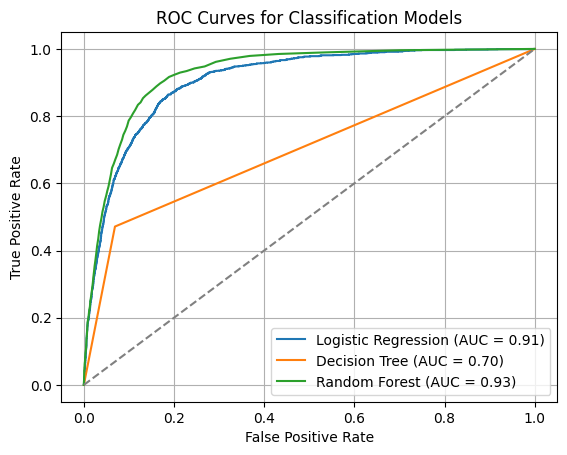

Comparison of ROC AUC Metrics:
                 Model   ROC AUC
0  Logistic Regression  0.906268
1        Decision Tree  0.701130
2        Random Forest  0.926852
3  Logistic Regression  0.906268
4        Decision Tree  0.701130
5        Random Forest  0.926852


In [61]:
# Store evaluation metrics for each model
metrics = []

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Use 'weighted' if multi-class
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    # Append results
    metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Append results
    roc_metrics.append({
        'Model': name,
        'ROC AUC': roc_auc
    })

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add plot labels and legend
plt.title('ROC Curves for Classification Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.grid()
plt.show()

# Convert ROC metrics to DataFrame for comparison
roc_df = pd.DataFrame(roc_metrics)

# Display the ROC metrics
print("Comparison of ROC AUC Metrics:")
print(roc_df)

**Comparing other evaluation metrics**

In [62]:
# Convert metrics to a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Display the results
print("Comparison of Evaluation Metrics:")
print(metrics_df)

# Optionally save the results to a CSV file
metrics_df.to_csv('model_comparison.csv', index=False)

Comparison of Evaluation Metrics:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.900927   0.647436  0.329205  0.436474
1        Decision Tree  0.877374   0.473788  0.471317  0.472549
2        Random Forest  0.903586   0.661389  0.353977  0.461146
